In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Preprocessing Data

In [3]:
df = load_diabetes()
x = df.data
y = df.target.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

print(f"y shape: {y_train.shape}     x shape: {x_train.shape}")

y shape: (309, 1)     x shape: (309, 10)


In [23]:
def build_model(num_features:int , num_targets: int) -> Sequential:
    model = Sequential()
    model.add(Dense(units=64, input_shape=(num_features,)))
    model.add(Activation("relu"))
    model.add(Dense(units=128, input_shape=(num_features,)))
    model.add(Activation("relu"))
    model.add(Dense(units=num_targets))
    return model

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 64)                704       
                                                                 
 activation_48 (Activation)  (None, 64)                0         
                                                                 
 dense_79 (Dense)            (None, 128)               8320      
                                                                 
 activation_49 (Activation)  (None, 128)               0         
                                                                 
 dense_80 (Dense)            (None, 1)                 129       
                                                                 
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] -

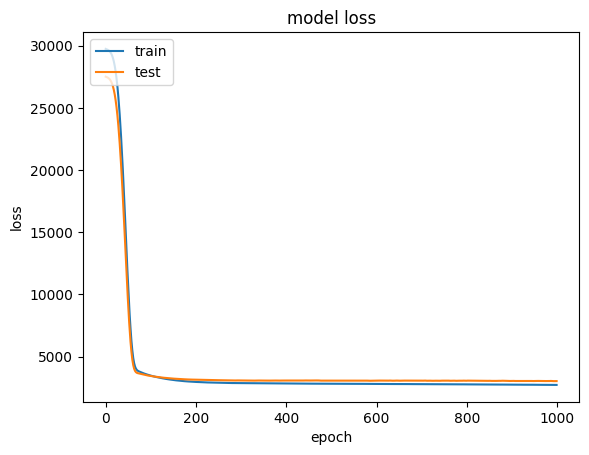

In [39]:
num_features = x_train.shape[1]
num_targets = y_train.shape[1]

model = build_model(num_features=num_features, num_targets=num_targets)

model.summary()

model.compile(loss="mse",
              optimizer=Adam(learning_rate=0.001),
              metrics=[tf.keras.metrics.MAE])

history = model.fit (x=x_train, 
           y=y_train, 
           epochs=100, 
           batch_size=128, 
           verbose=1, 
           validation_data=(x_test, y_test))

scores = model.evaluate(x=x_test, y=y_test)

print(f"Score: {scores}")

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()